# Wire Scanner

This notebook demostrates how to use *phantasy* to model a real wire-scanner device, within which measured data come from real devices, or external data files.

* Build wire scanner device from scratch with data from simulation, see *ws_device.ipynb*
* Analysis with dumped object, see *ws_data.ipynb*

### Build wires from external data files (non-json)

In [1]:
from phantasy.apps import Wire, WireScannerData
from phantasy import Line
import numpy as np

As we know that wire AB is D_wire, wire CD is V_wire and wire EF is H_wire, build new wires with data:

Please note wire created by this way:
- users should maintain properties like *line*, *direction*, or default values would be applied, which might be not correct for the general case.
- *xstream* and *ystream* could be assigned with data from experiments.

In [2]:
# e.g.1
#data = np.loadtxt('data/case2/data_cor_2.dat')
#direction = (-45, 0.2, 120)
#h0, v0 = 15, -10

# e.g.2
data = np.loadtxt('data/case1/datafiles/demo3.dat')
direction = (225, 0.2, 120)
h0, v0 = 15, 10

In [3]:
hx, hy = data[:,2], data[:,3]
vx, vy = data[:,0], data[:,1]
dx, dy = data[:,4], data[:,5]

In [4]:
h_wire = Wire('H', line=Line((0,0), (1,0)))
# NOTE: define line property to indicate wire position
h_wire.direction = direction
h_wire.xstream = hx
h_wire.ystream = hy
h_wire.line = Line((0, h0), (1, h0))

In [5]:
v_wire = Wire('V', line=Line((0,0), (0,1)))
v_wire.direction = direction
v_wire.xstream = vx
v_wire.ystream = vy
v_wire.line = Line((v0, 0), (v0, 1))

In [6]:
d_wire = Wire('D', line=Line((0,1),(1,0)))
d_wire.direction = direction
d_wire.xstream = dx
d_wire.ystream = dy

In [7]:
wsd = WireScannerData()
wsd.H_wire = h_wire
wsd.V_wire = v_wire
wsd.D_wire = d_wire

In [8]:
res = wsd.process(fit_model='gaussian')

In [9]:
res

{u'mcov': array([[ 0.03880917,  0.03907031],
        [ 0.03907031,  0.08826835]]),
 u'rho_xy': 0.66753974951634509,
 u'sigma_x': 0.19700043450844501,
 u'sigma_y': 0.29709989444892365,
 u'x0': 0.0014580854307748581,
 u'y0': 0.00070660723706694739}

In [10]:
res = wsd.process()

In [11]:
res

{u'mcov': array([[ 0.0384353 ,  0.04963478],
        [ 0.04963478,  0.08485516]]),
 u'rho_xy': 0.86912414218003975,
 u'sigma_x': 0.19604922052705728,
 u'sigma_y': 0.29129908794242454,
 u'x0': 0.00077439598398676424,
 u'y0': -0.00095803655582571423}

In [12]:
wsd.report()

Analysis report:
------------------------------
(x_0, y_0) = (0.001, -0.001)
sigma_x = 0.196
sigma_y = 0.291
(x,y) correlation = 0.869
------------------------------


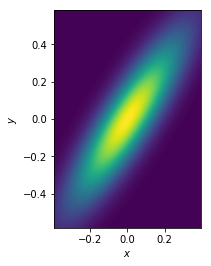

In [13]:
x,y,z = wsd.restructure(mcov=res['mcov'], p0=(res['x0'],res['y0']), fac=2, zoom=10, ngrid=500, level=100)

### Build wires from external data files (json)

In [14]:
import json

with open('ws-0001.json', 'rb') as fp:
    data = json.load(fp)

direction = (225, 0.2, 120)
h0, v0 = 15, 10

In [15]:
h_wire = Wire('H', line=Line((0,0), (1,0)))
h_wire.direction = direction
h_wire.xstream = data['EF']['x']
h_wire.ystream = data['EF']['y']
h_wire.line = Line((0, h0), (1, h0))

In [16]:
v_wire = Wire('V', line=Line((0,0), (0,1)))
v_wire.direction = direction
v_wire.xstream = data['CD']['x']
v_wire.ystream = data['CD']['y']
v_wire.line = Line((v0, 0), (v0, 1))

In [17]:
d_wire = Wire('D', line=Line((0,1), (1,0)))
d_wire.direction = direction
d_wire.xstream = data['AB']['x']
d_wire.ystream = data['AB']['y']

In [18]:
wsd = WireScannerData()
wsd.H_wire = h_wire
wsd.V_wire = v_wire
wsd.D_wire = d_wire

In [19]:
res = wsd.process()

In [24]:
wsd.report()

Analysis report:
------------------------------
(x_0, y_0) = (0.001, -0.001)
sigma_x = 0.196
sigma_y = 0.291
(x,y) correlation = 1.000
------------------------------


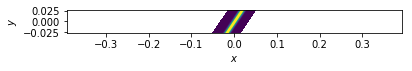

In [23]:
x,y,z = wsd.restructure(mcov=res['mcov'], p0=(res['x0'],res['y0']), fac=2, zoom=10, ngrid=500, level=100)